# LOGISTIC REGRESSION ALGORITHEM

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('STRESS.csv')
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
df=df.dropna()

In [4]:
df.columns

Index(['sr', 'rr', 't', 'lm', 'bo', 'rem', 'sr.1', 'hr', 'sl'], dtype='object')

In [5]:
df.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [6]:
x1 = df.drop(labels='sl', axis=1)
y1 = df.loc[:,'sl']

In [7]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  504
NUMBER OF TEST DATASET      :  126
TOTAL NUMBER OF DATASET    :  630


In [9]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  504
NUMBER OF TEST DATASET      :  126
TOTAL NUMBER OF DATASET    :  630


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [12]:
predicted = lr.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,predicted)
print('THE CLASSIFICATION REPORT OF LOGISTIC REGRESSION:\n\n',cr)

THE CLASSIFICATION REPORT OF LOGISTIC REGRESSION:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        25
           2       1.00      1.00      1.00        25
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        25

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [14]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:


 [[25  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


In [15]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(lr, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [100. 100. 100. 100. 100.]


In [16]:
from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF LOGISTIC REGRESSION IS :",a*100)

THE ACCURACY SCORE OF LOGISTIC REGRESSION IS : 100.0


In [17]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF LOGISTIC REGRESSION IS :",hl*100)

THE HAMMING LOSS OF LOGISTIC REGRESSION IS : 0.0


THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:


[[25  0  0  0  0]
 [ 0 25  0  0  0]
 [ 0  0 25  0  0]
 [ 0  0  0 26  0]
 [ 0  0  0  0 25]]


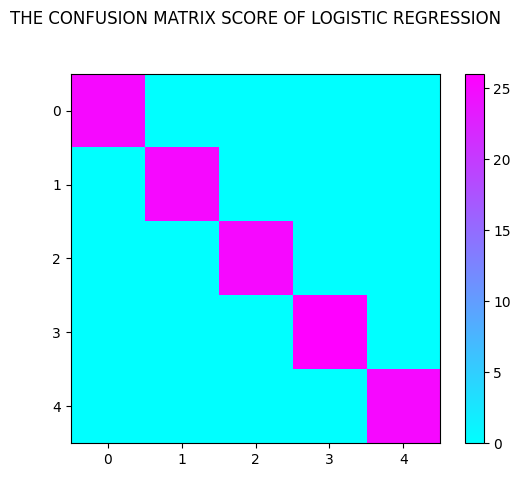

In [18]:
def plot_confusion_matrix(cm, title='THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION\n\n', cmap=plt.cm.cool):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

cm1=confusion_matrix(y_test, predicted)
print('THE CONFUSION MATRIX SCORE OF LOGISTIC REGRESSION:\n\n')
print(cm)
plot_confusion_matrix(cm)

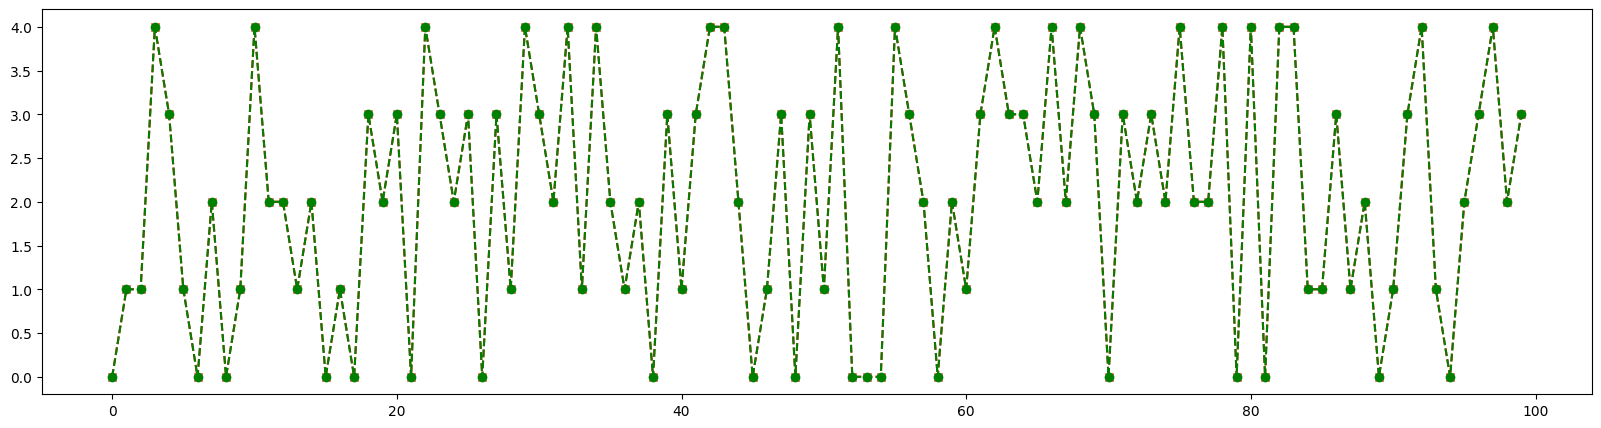

In [19]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()